In [1]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN'], axis=1)

In [4]:
application_df['NAME'].value_counts()

,count
NAME,
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
...,...
ST LOUIS SLAM WOMENS FOOTBALL,1
AIESEC ALUMNI IBEROAMERICA CORP,1
WEALLBLEEDRED ORG INC,1


In [5]:
#finding the number of unique element in the dataframe's colums
application_df.nunique()

,0
NAME,19568
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747


In [6]:
# Look at NAME counts for binning
counts1 = application_df['NAME'].value_counts()
counts1

,count
NAME,
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
...,...
ST LOUIS SLAM WOMENS FOOTBALL,1
AIESEC ALUMNI IBEROAMERICA CORP,1
WEALLBLEEDRED ORG INC,1


In [7]:
# Choose a cutoff value and create a list of names_replace to be replaced
# use the variable name names_replace
names_replace = list(counts1[counts1<5].index)
names_replace

['AMALGAMATED TRANSIT UNION',
 '4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS',
 'TEXAS WATER UTILITIES ASSOCIATION',
 'PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC',
 'THE UNITED STATE PONY CLUBS INC',
 'WESTERN GOVERNORS UNIVERSITY',
 'AMERICAN ORFF-SCHULWERK ASSOCIATION',
 'GAMMA PHI BETA SORORITY INC',
 'AMATEUR ATHLETIC UNION OV THE UNITED STATES INC',
 'DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC',
 'PILOT CLUB INTERNATIONAL',
 'DELTA CHI NATIONAL HOUSING CORPORATION',
 'SOROPTIMIST INTERNATIONAL TO THE AMERICAS INC',
 'WOODMEN OF THE WORLD LIFE INSURANCE SOCIETY',
 'COMMUNICATION ALLIANCE TO NETWORK THOROUGHBRED EX-RACEHORSES',
 'BLUE STAR MOTHERS OF AMERICA INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION',
 'YOUNG CATHOLIC PROFESSIONALS',
 'METHODIST RETIREMENT COMMUNITIES',
 'PTA NEW MEXICO CONGRESS',
 'UNITED MINE WORKERS OF AMERICA- INTERNATIONAL',
 'TEXAS EXTENSION EDUCATION ASSOCIATION',
 'VESTAVIA HILLS PARENT TEACHER ORGANIZATION INC',
 'INTERNATIONAL ASSOCIAT

In [8]:
# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

,count
NAME,
Other,19803
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
...,...
GUILDS OF THE SANTA FE OPERA INC,5
FAMILY MOTOR COACH ASSOCIATION,5
JAMESTOWN SOCIETY,5


In [9]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [10]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
print(application_df.nunique())

NAME                       403
APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [11]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [12]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = ['T9', 'T13', 'T12','T2','T25','T14','T29' , 'T15' ,'T17']
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [13]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [14]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
print(application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() >1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [15]:
# You may find it helpful to look at CLASSIFICATION value counts==1
#  YOUR CODE GOES HERE
print(application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() ==1])

CLASSIFICATION
C2190    1
C4200    1
C2600    1
C5200    1
C1370    1
C1248    1
C6100    1
C1820    1
C1900    1
C1236    1
C3700    1
C2570    1
C1580    1
C1245    1
C2500    1
C1570    1
C1283    1
C2380    1
C1732    1
C1728    1
C2170    1
C4120    1
C8210    1
C2561    1
C4500    1
C2150    1
Name: count, dtype: int64


In [16]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = ['C7000','C1700','C4000','C5000','C1270','C2700','C2800','C7100','C1300','C1280','C1230','C1400',
                              'C7200','C2300','C1240','C8000','C7120','C1500','C1800','C6000','C1250','C8200','C1238','C1278',
                              'C1235','C1237','C7210','C2400','C1720','C4100','C1257','C1600','C1260','C2710',
                              'C0','C3200','C1234','C1246','C1267','C1256','C2190','C4200','C2600','C5200','C1370','C1248','C6100','C1820',
                              'C1900','C1236','C3700','C2570','C1580','C1245','C2500','C1570','C1283','C2380',
                              'C1732','C1728','C2170','C4120','C8210','C2561','C4500','C2150']
# Replace in dataframe

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df)

In [18]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'NAME_AACE INTERNATIONAL',
       'NAME_ACE MENTOR PROGRAM OF AMERICA INC', 'NAME_ACTS MINISTRY',
       'NAME_ACTS MISSIONS',
       'NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS',
       'NAME_AIR FORCE ASSOCIATION', 'NAME_ALABAMA FEDERATION OF WOMENS CLUBS',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=447)

<Axes: >

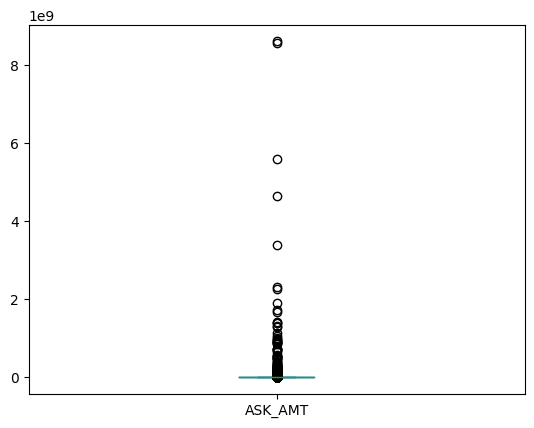

In [19]:
application_df['ASK_AMT'].plot(kind="box")

In [20]:
first_quantile_amt = np.percentile(application_df['ASK_AMT'], 25)
third_quantile_amt = np.percentile(application_df['ASK_AMT'], 75)
iqr_amt = third_quantile_amt - first_quantile_amt

lower_bound_amt = first_quantile_amt - (1.5 * iqr_amt)
upper_bound_amt = third_quantile_amt + (1.5 * iqr_amt)

print(f"Values below {lower_bound_amt} could be outliers.")
print(f"Values above {upper_bound_amt} could be outliers.")

Values below 887.0 could be outliers.
Values above 11855.0 could be outliers.


In [21]:
def remove_amt_outliers(amount):
    if amount < lower_bound_amt:
        return lower_bound_amt
    elif amount > upper_bound_amt:
        return upper_bound_amt
    return amount
application_df['ASK_AMT'] = application_df['ASK_AMT'].apply(remove_amt_outliers)

<Axes: >

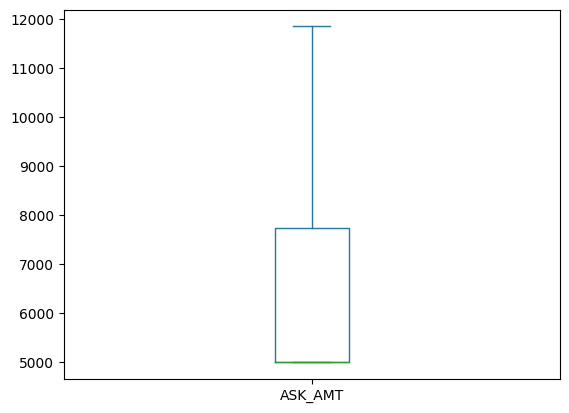

In [22]:
application_df['ASK_AMT'].plot(kind="box")

In [23]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'NAME_AACE INTERNATIONAL',
       'NAME_ACE MENTOR PROGRAM OF AMERICA INC', 'NAME_ACTS MINISTRY',
       'NAME_ACTS MISSIONS',
       'NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS',
       'NAME_AIR FORCE ASSOCIATION', 'NAME_ALABAMA FEDERATION OF WOMENS CLUBS',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=447)

In [24]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
features = application_df.drop('IS_SUCCESSFUL', axis=1)
target = application_df['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
X_train_scaled.shape

(27439, 446)

In [27]:
X_test_scaled.shape

(6860, 446)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=10,input_dim=len(X_train.columns), activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))


#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           4,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,711 (18.40 KB)

 Trainable params: 4,711 (18.40 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Set up early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=10, callbacks=[early_stopping_callback])

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7344 - loss: 0.5662
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7997 - loss: 0.4325
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7941 - loss: 0.4334
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7992 - loss: 0.4182
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8007 - loss: 0.4154
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8002 - loss: 0.4146
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7984 - loss: 0.4178
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8002 - loss: 0.4136
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8013 - loss: 0.4148
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8010 - loss: 0.4169


In [33]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_optimzation.h5")